In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#loading the train and test data
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
y_train=df_train.iloc[:,-1].values
df_train.drop(["SalePrice"],axis=1,inplace=True)
df=pd.concat([df_train,df_test])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [4]:
# Removing features with > 50% missing values
missing=df.isnull().sum()/len(df)
miss_features=missing.loc[missing>0.5].index
df.drop(miss_features,inplace=True,axis=1)

In [5]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359


In [6]:
# removing features that has <+-0.3 correlation coefficient from SalePrice
df.drop(["Id","YrSold","MoSold","MiscVal","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch","KitchenAbvGr",
         "BedroomAbvGr", "HalfBath","BsmtFullBath","BsmtHalfBath","LowQualFinSF","BsmtUnfSF","BsmtFinSF2","MSSubClass",
         "OverallCond", "LotArea"],inplace=True,axis=1)

In [7]:
# fillna
for bsmt in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]:
    df[bsmt].fillna("No",inplace=True)



df["FireplaceQu"].fillna("No",inplace=True)

for gar in ('GarageType', 'GarageFinish', 'GarageQual',"GarageYrBlt","GarageCond"):
    df[gar].fillna('No',inplace=True)
    
for gar1 in ('GarageCars', 'GarageArea'):
    df[gar1].fillna(0,inplace=True)

for ea in ("LotFrontage","MasVnrArea","TotalBsmtSF","BsmtFinSF1"):
    df[ea].fillna(df[ea].mean(),inplace=True)

for _ in ("MasVnrType","MSZoning","Utilities","Exterior1st","Exterior2nd","Functional","KitchenQual","SaleType","Electrical"):
    df[_].fillna(df[_].mode()[0],inplace=True)

In [8]:
# encoding categorical features
df=pd.get_dummies(df,columns=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope",
                              "Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl",
                              "Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual",
                              "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir",
                              "Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageYrBlt","GarageFinish",
                              "GarageQual","GarageCond","PavedDrive","SaleType","SaleCondition"],
                  prefix=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood",
                          "Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd",
                          "MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                          "BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional",
                          "FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PavedDrive",
                          "SaleType","SaleCondition"],drop_first=True)

In [9]:
# Convert dataframe into X and y numpy array
X_train=df.iloc[:1460,:].values

X_test=df.iloc[1460:,:].values

In [10]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)

In [11]:
# add columns of ones to X
m,n=X_train.shape[0],X_train.shape[1]
X_train = np.append(np.ones((m,1)),X_train,axis=1)
theta=np.zeros((n+1,1))

In [12]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [13]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [14]:
# Run gradient descent
theta, J_history = gradientDescent(X_train,y_train.reshape(m,1),theta,0.01,400)

Text(0.5,1,'Cost function using Gradient Descent')

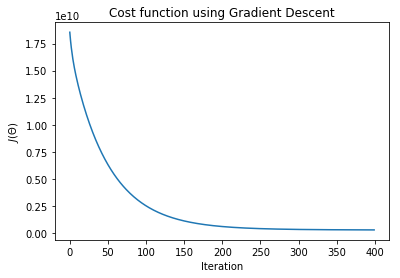

In [15]:
# visualize the cost function
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [16]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(x,theta)
    
    return predictions

In [17]:
#feature normalisation of X_test values
X_test= sc_X.fit_transform(X_test)
X_test=np.append(np.ones((X_test.shape[0],1)),X_test,axis=1)
predict=predict(X_test,theta)

In [18]:
# export as csv
np.savetxt("submission.csv",predict,fmt="%.1f")